<a href="https://colab.research.google.com/github/HaifaAziz1/IT326-Mushroom-Project/blob/main/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Mining Phase 3**



---
introduction goes here


# 1. **Classification**

### Loading data & defining splits

In this step, we began by importing the essential libraries for this phase.

We used pandas and numpy for data handling, matplotlib and seaborn for visualization, and scikit-learn for machine learning algorithms and evaluation metrics.


The dataset is loaded directly from our GitHub repository containing the preprocessed mushroom characteristics.
We separated the target variable ('class' - indicating edible or poisonous) from the feature set, then defined three different train-test splits:

*   60% train / 40% test
*   70% train / 30% test
*   80% train / 20% test


this step is essential to compare how data partitioning affects model performance.



In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
!pip install kneed

# loading data
url = "https://raw.githubusercontent.com/HaifaAziz1/IT326-Mushroom-Project/refs/heads/main/Dataset/Preprocessed_dataset.csv"
df = pd.read_csv(url)

# separating target from features
X = df.drop('class', axis=1)
y = df['class']

# defining different split ratios
split_ratios = [0.4, 0.3, 0.2]
split_names = ['60/40', '70/30', '80/20']
results = []

## **a. Decision Tree (Gini index)**


### Model Training & Evaluation




We now implement our experimental design by training and evaluating Decision Tree models across the three predefined data splits:

For every split scenario, we:

* Partition the dataset into training and testing subsets
* Train a Decision Tree with consistent parameters (Gini criterion, max depth 3)

* Evaluate performance through accuracy scores and confusion matrices

* Visualize the resulting decision tree


Note: after experimenting with various tree depths, we selected max_depth = 3 as it provided the optimal balance between model performance (98% accuracy) and generalization capability, avoiding the overfitting observed in deeper trees that achieved 100% accuracy.


SPLIT: 60/40 (Test Size: 0.4)
Training set size: 4874
Test set size: 3250

=== DECISION TREE RESULTS ===
Test Accuracy: 98.15%
Confusion Matrix:
[[1665   18]
 [  42 1525]]


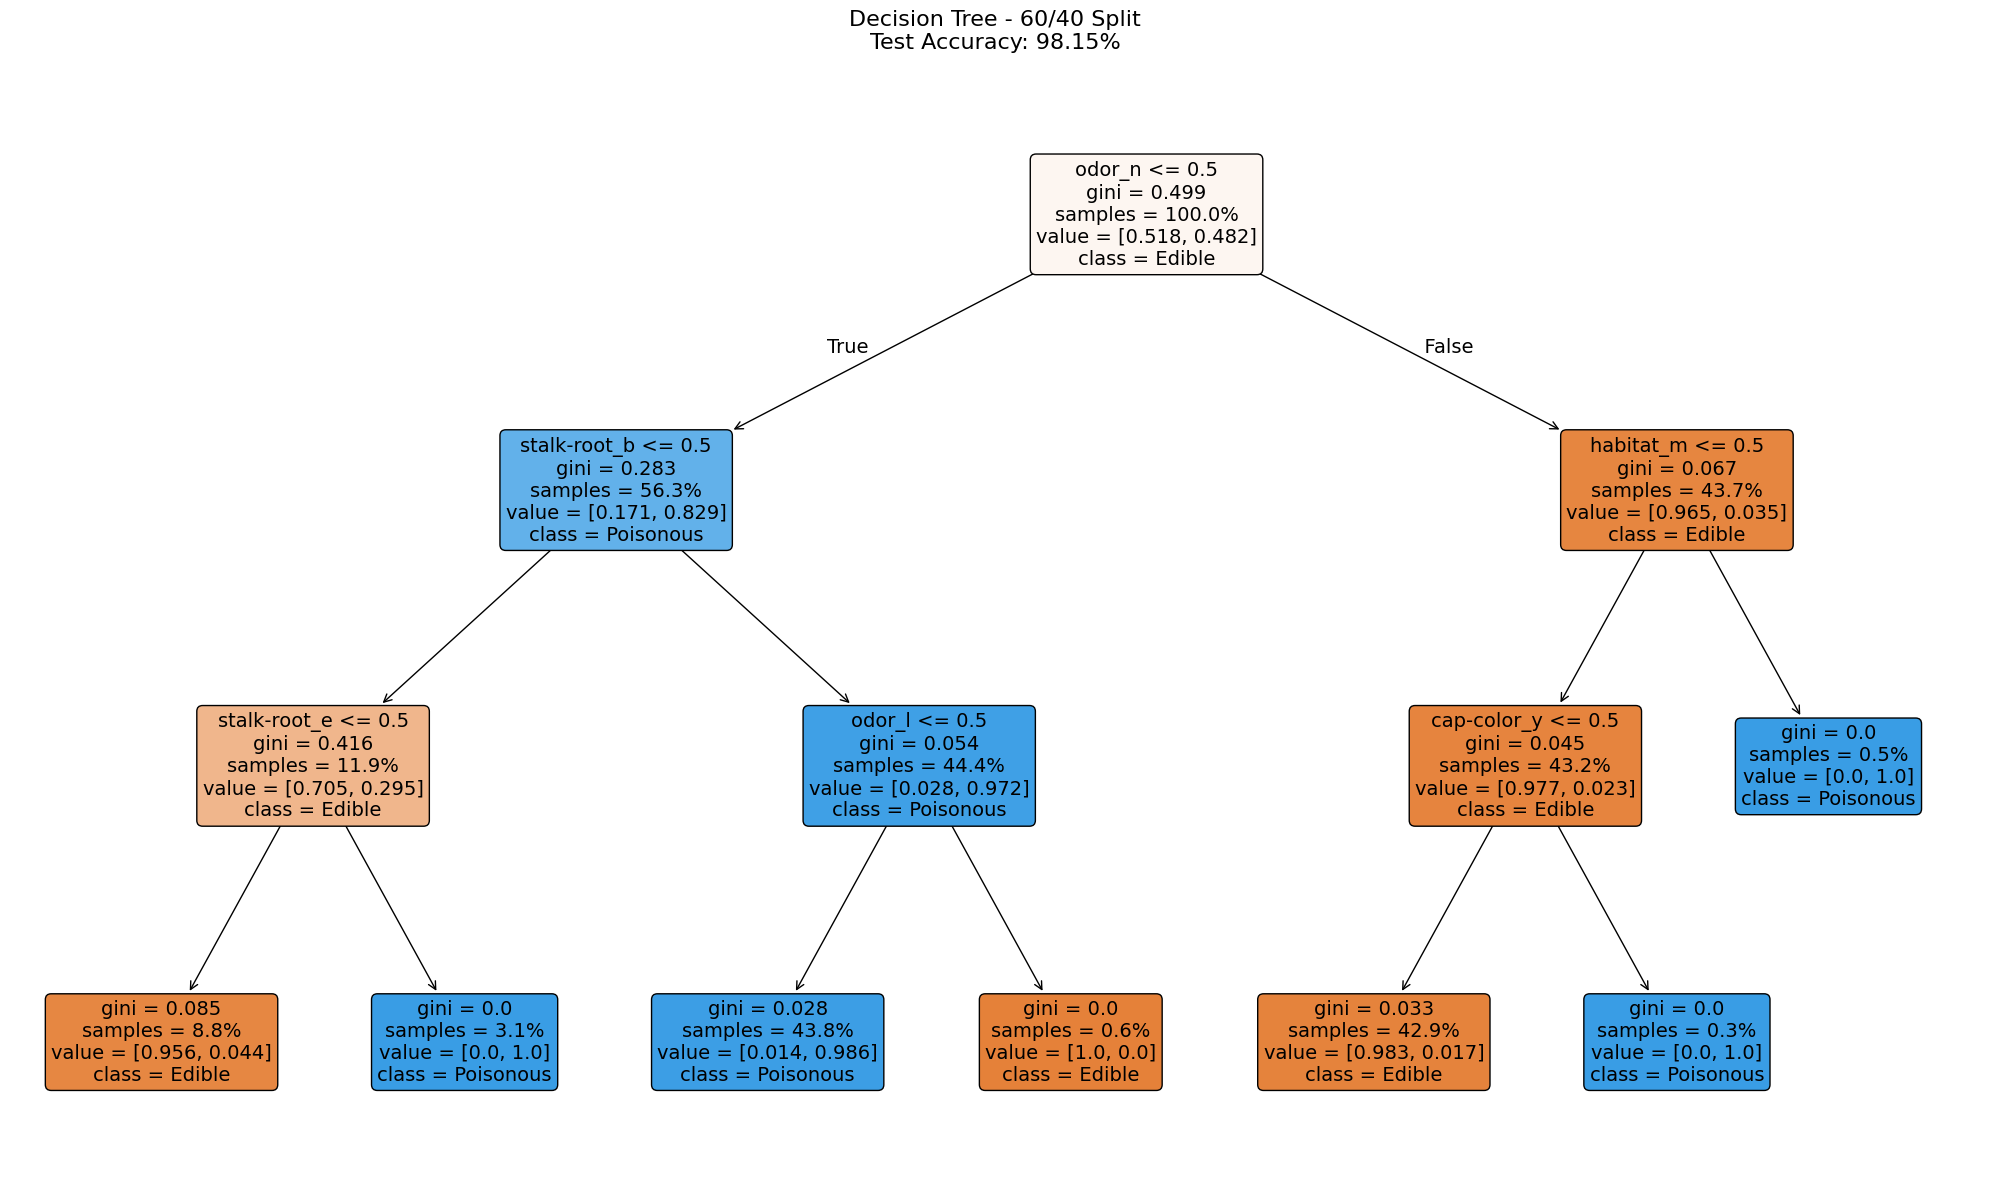


SPLIT: 70/30 (Test Size: 0.3)
Training set size: 5686
Test set size: 2438

=== DECISION TREE RESULTS ===
Test Accuracy: 98.07%
Confusion Matrix:
[[1248   15]
 [  32 1143]]


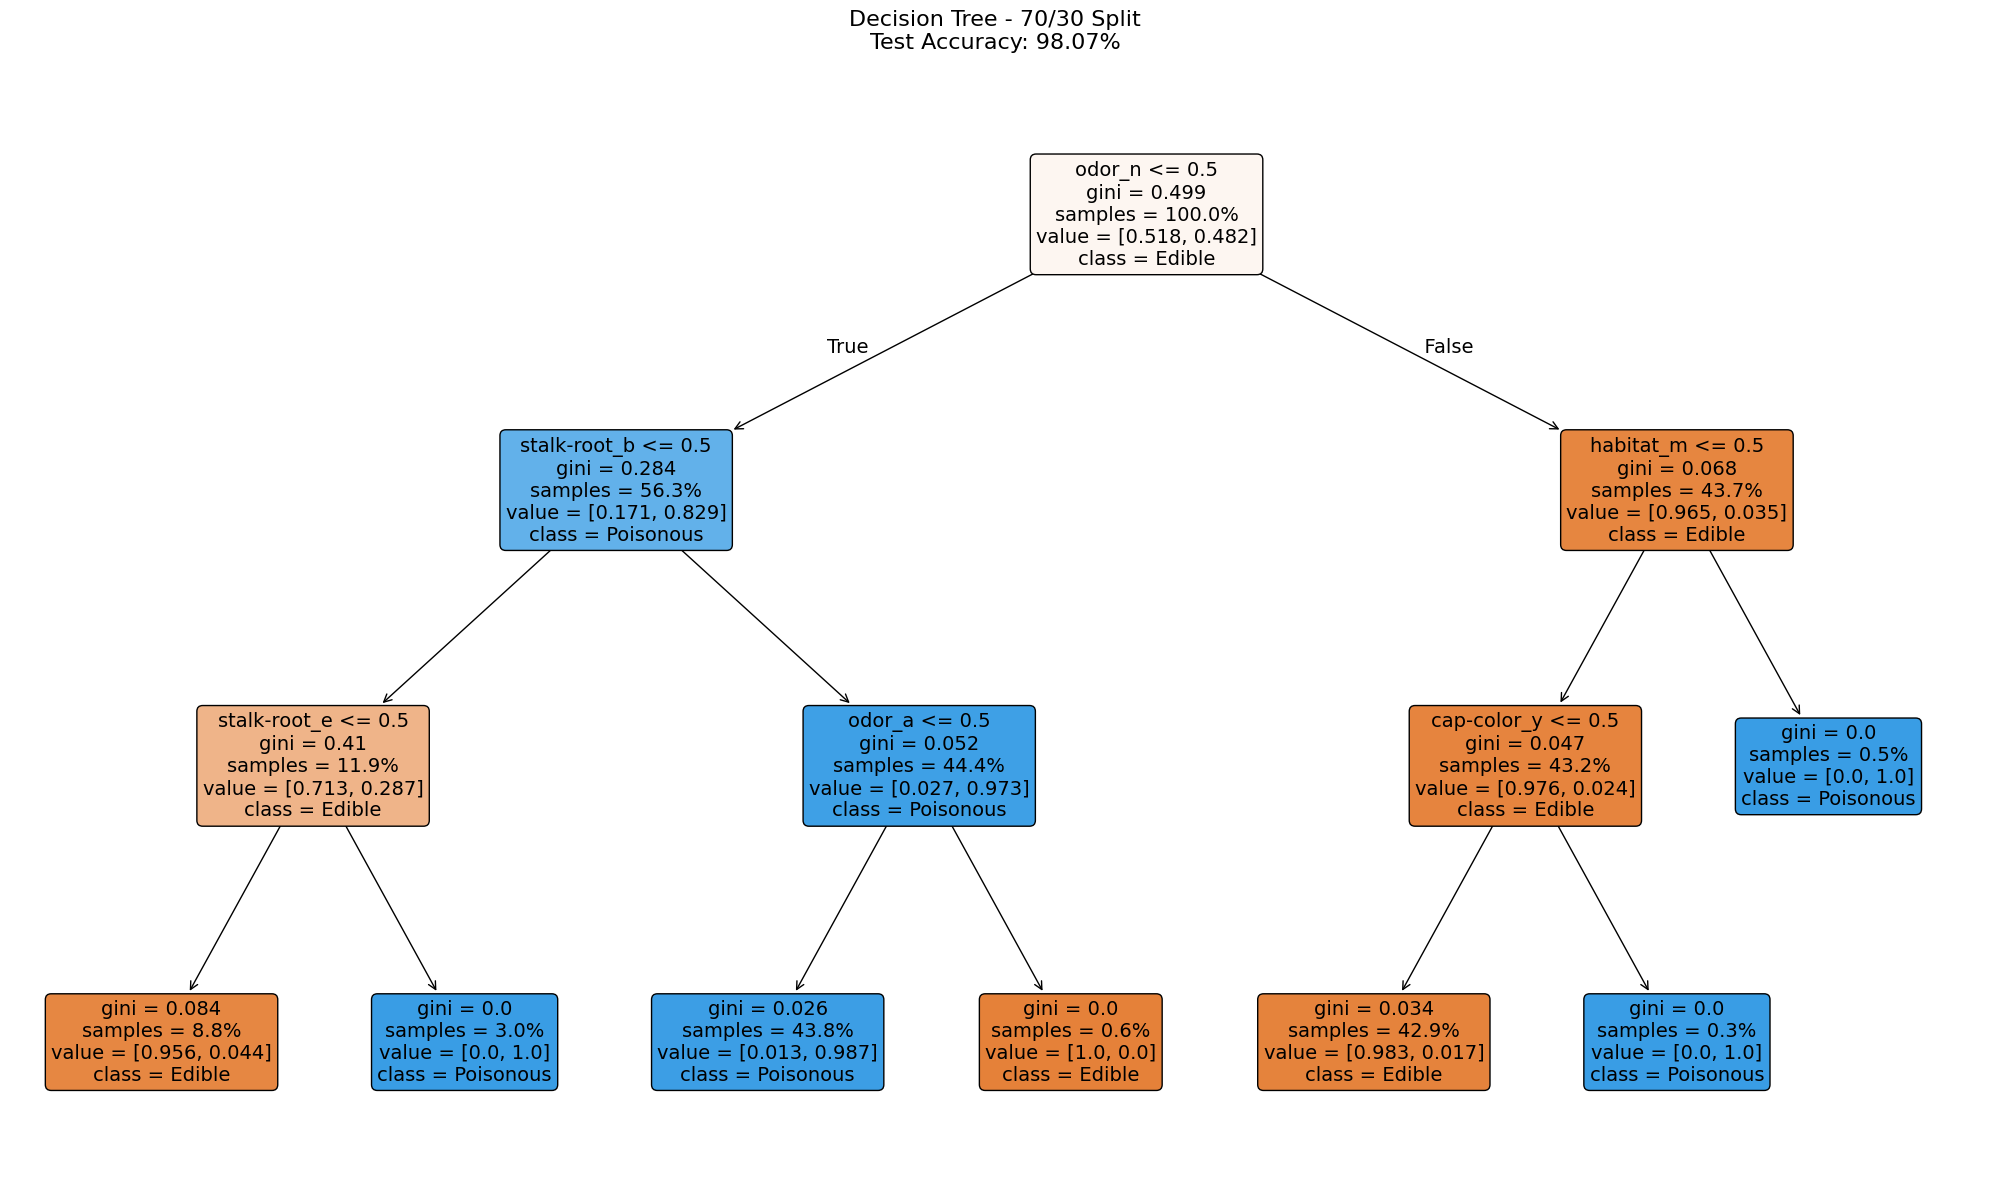


SPLIT: 80/20 (Test Size: 0.2)
Training set size: 6499
Test set size: 1625

=== DECISION TREE RESULTS ===
Test Accuracy: 97.97%
Confusion Matrix:
[[830  12]
 [ 21 762]]


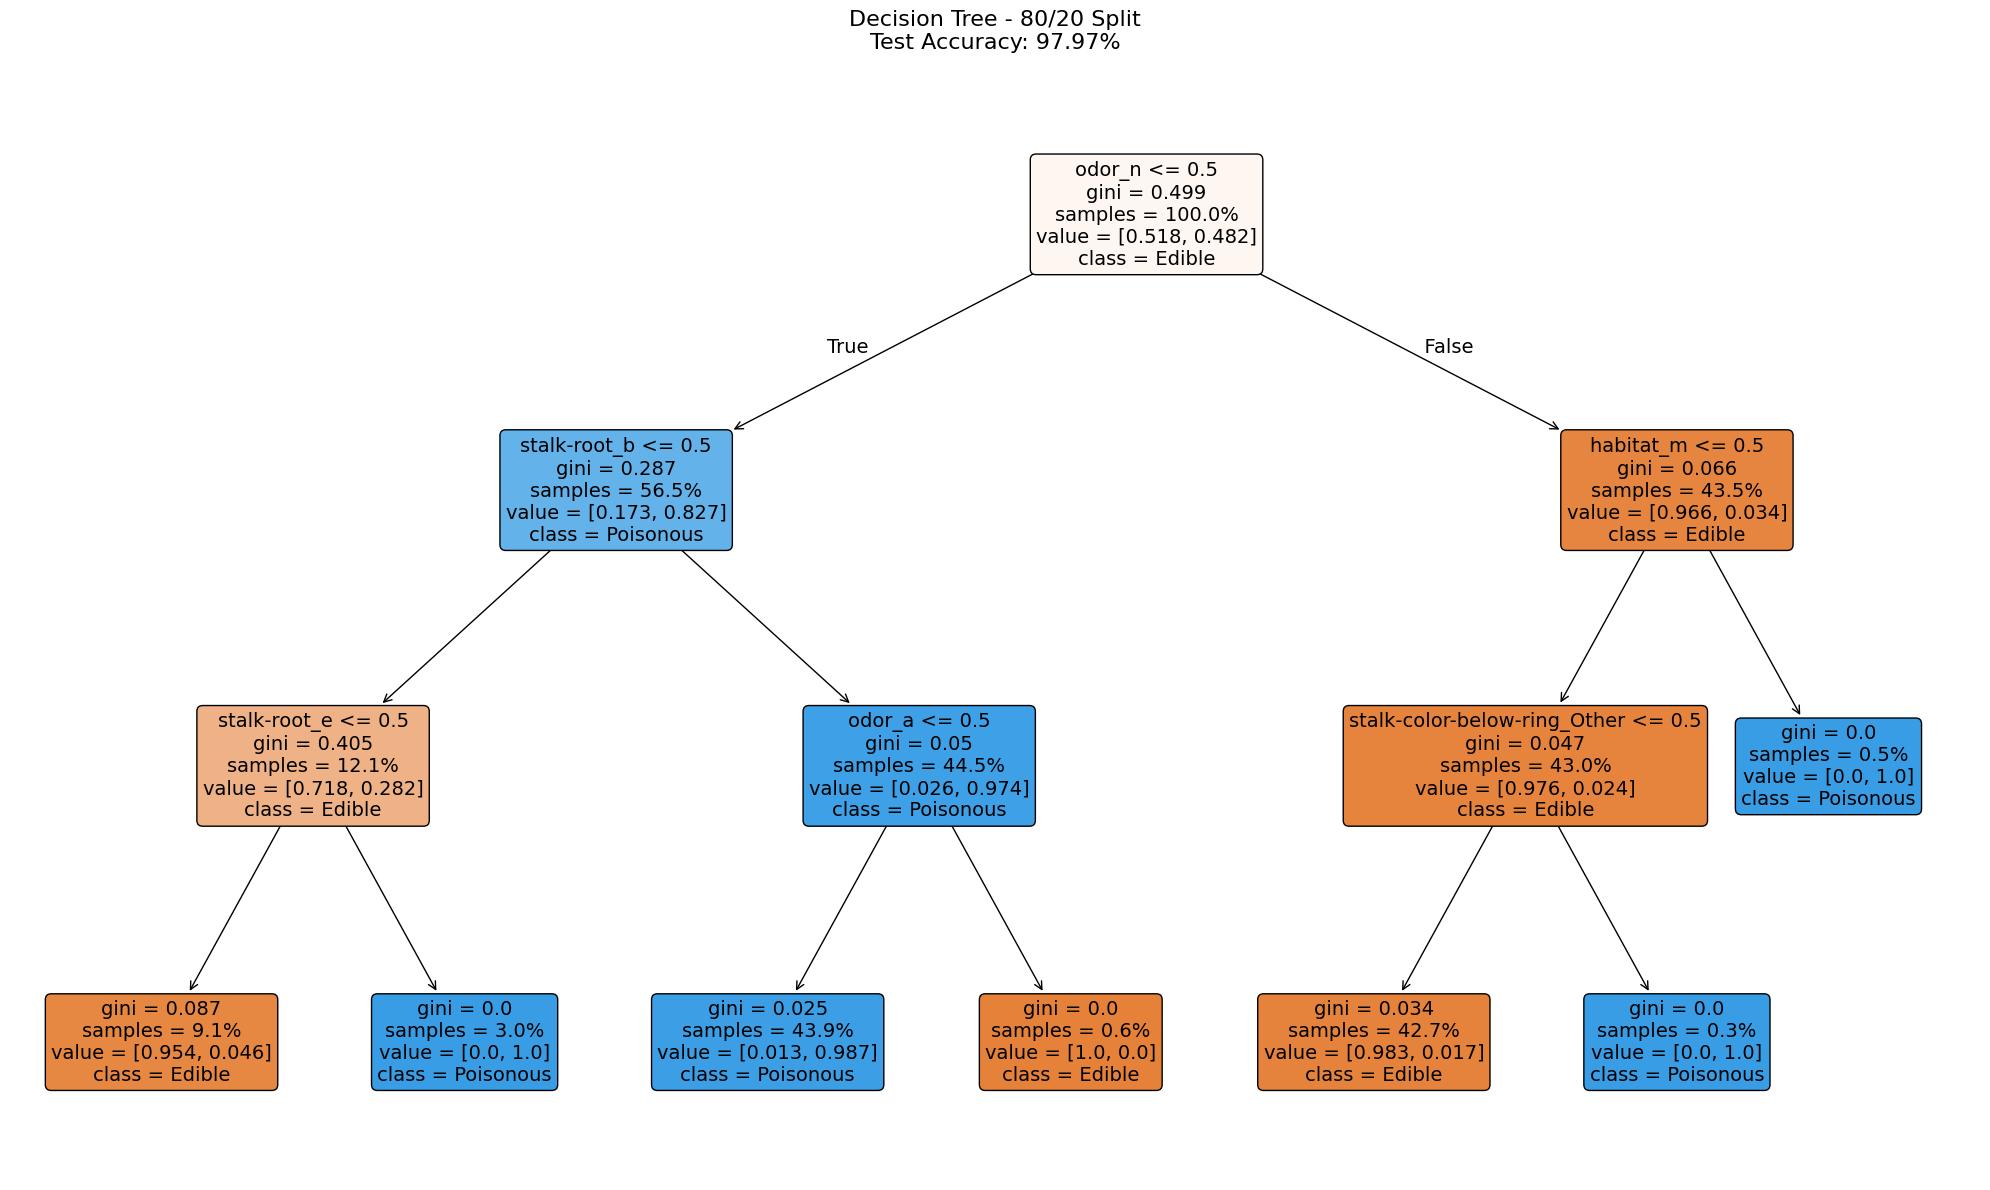

In [ ]:
# experimenting with different data split ratios
for i, test_size in enumerate(split_ratios):
    print(f"\n{'='*50}")
    print(f"SPLIT: {split_names[i]} (Test Size: {test_size})")
    print(f"{'='*50}")

    # splitting data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=42,
        stratify=y # startification helps by maintaining class balance in splits
    )

    print(f"Training set size: {len(X_train)}")
    print(f"Test set size: {len(X_test)}")

    # Initializing the Decision Tree classifier (Gini)
    dt_model = DecisionTreeClassifier(
        criterion='gini',
        random_state=42,
        max_depth=3
    )

    # training the model & making predictions
    dt_model.fit(X_train, y_train)
    y_pred = dt_model.predict(X_test)

    # displaying model performance metrics
    test_accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print("\n=== DECISION TREE RESULTS ===")
    print(f"Test Accuracy: {test_accuracy:.2%}")
    print(f"Confusion Matrix:")
    print(cm)

    # Saving results for later summary
    results.append({
        'split': split_names[i],
        'train_size': len(X_train),
        'test_size': len(X_test),
        'test_accuracy': test_accuracy,
        'confusion_matrix': cm
    })

    # visualizing the decision tree
    plt.figure(figsize=(20, 12))
    plot_tree(dt_model,
             filled=True,
             feature_names=X.columns,
             class_names=['Edible', 'Poisonous'],
             rounded=True,
             fontsize=14,
             proportion=True)

    plt.title(f'Decision Tree - {split_names[i]} Split\nTest Accuracy: {test_accuracy:.2%}',
              fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()

### Confusion Matrix Visualization

We display three confusion matrices side-by-side, one for each data split we tested. Each box shows:

* How many mushrooms were correctly classified as edible or poisonous

* How many were misclassified

* The overall accuracy percentage

This visual comparison makes it easy to see which data split gives the best results and whether the model makes consistent mistakes across different training scenarios.

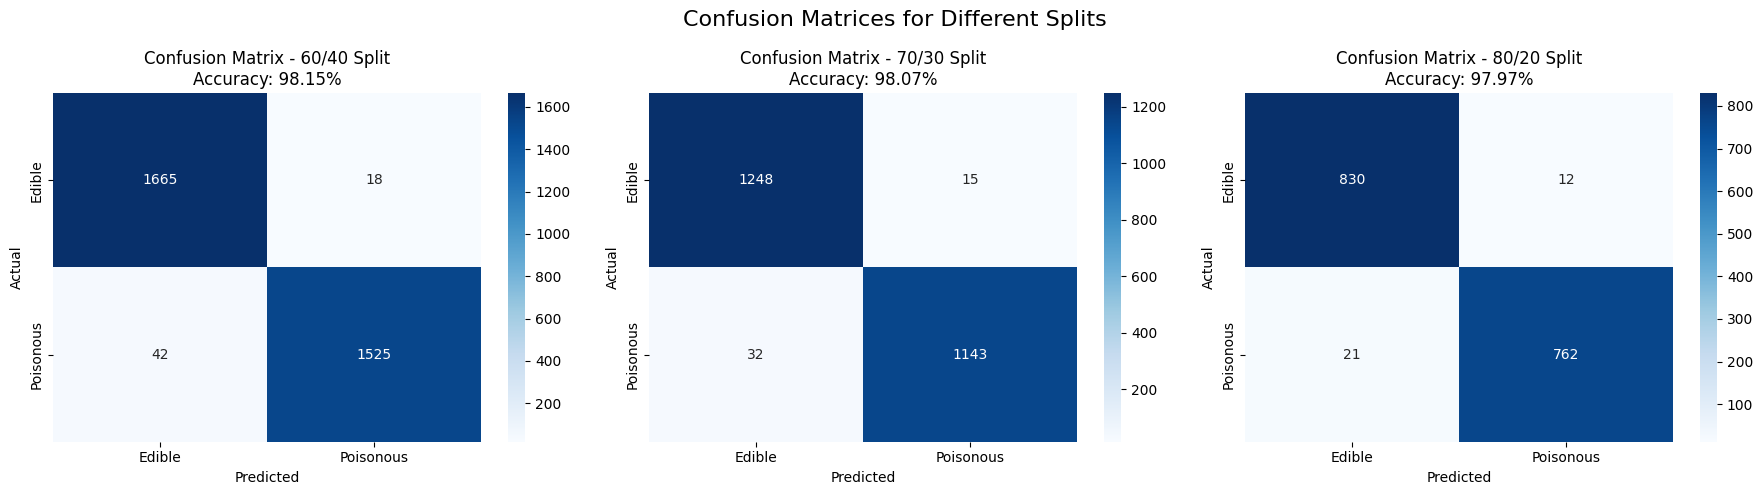

In [ ]:
# confusion matrices comparison
fig_cm, axes_cm = plt.subplots(1, 3, figsize=(18, 5))
fig_cm.suptitle('Confusion Matrices for Different Splits', fontsize=16)

for i, result in enumerate(results):
    ax = axes_cm[i]
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
    ax.set_title(f'Confusion Matrix - {result["split"]} Split\nAccuracy: {result["test_accuracy"]:.2%}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()




### Summary of results

In conclusion, The model demonstrates consistently high performance (>97.9% accuracy) across all data splits, with a slight decrease in test accuracy as the size of the training set increases. This suggests the model is robust and not heavily dependent on the specific split ratio used in this experiment.

In [ ]:
# Printing summary
print(f"\n{'='*80}")
print("SUMMARY OF RESULTS (Gini index)")
print(f"{'='*80}")
print(f"{'Split Ratio':<10} {'Train Size':<10} {'Test Size':<10}  {'Test Acc':<12}")
print(f"{'-'*80}")

for result in results:
    print(f"{result['split']:<10} {result['train_size']:<10} {result['test_size']:<10}    {result['test_accuracy']:.2%}")


SUMMARY OF RESULTS (Gini index)
Split Ratio Train Size Test Size   Test Acc    
--------------------------------------------------------------------------------
60/40      4874       3250          98.15%
70/30      5686       2438          98.07%
80/20      6499       1625          97.97%


## **b. Decision Tree (Entropy)**

In [ ]:
X_entropy = df.drop("class", axis=1)
y_entropy = df["class"]

SPLIT: 60/40 (Test Size: 0.40)

Training set size: 4874
Test set size: 3250
Accuracy (60/40 - Entropy): 96.92%
Confusion Matrix (60/40 - Entropy):
 [[1683    0]
 [ 100 1467]]

----------------------------------------------------------------------



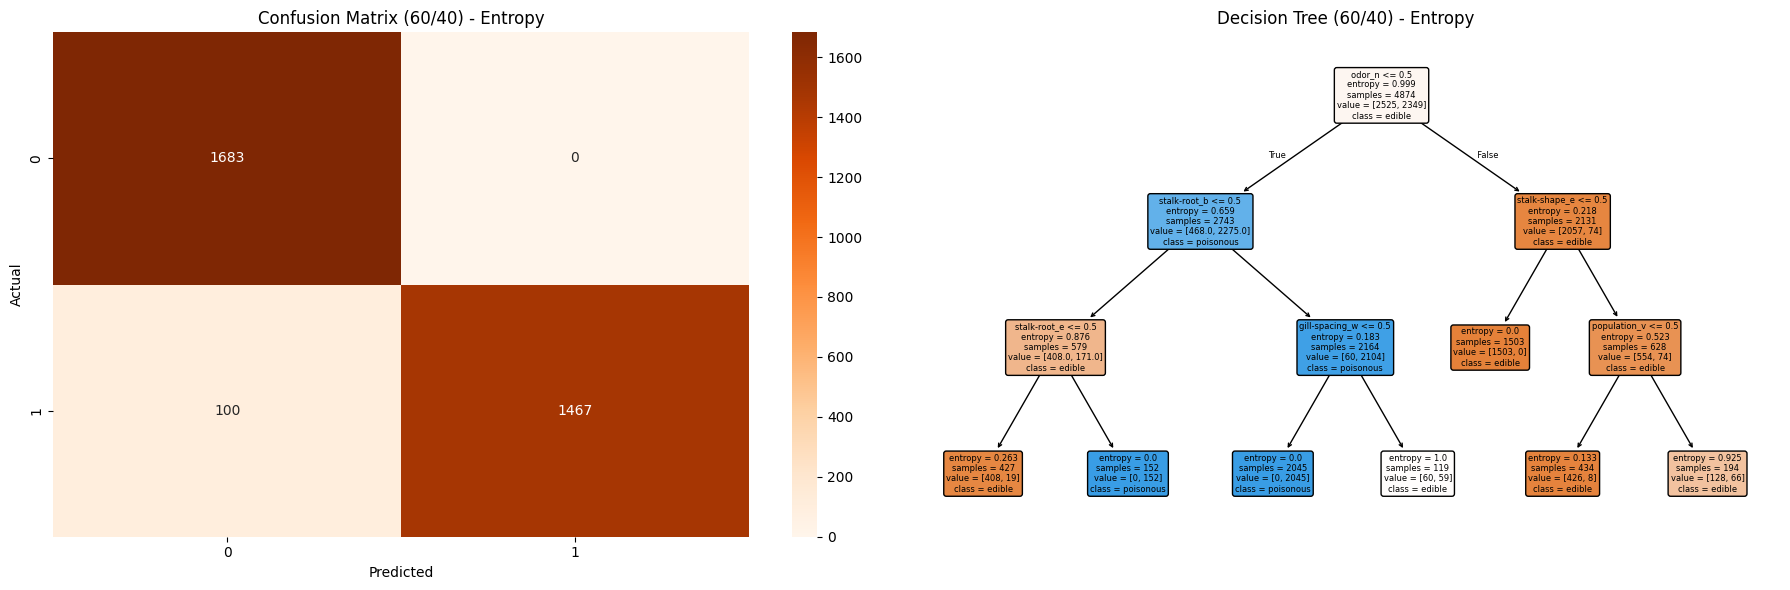

In [ ]:
# === 60/40 SPLIT ===

Xtr_60_entropy, Xte_40_entropy, ytr_60_entropy, yte_40_entropy = train_test_split(
    X_entropy, y_entropy, test_size=0.40, random_state=42, stratify=y_entropy
)

entropy_model_60 = DecisionTreeClassifier(
    criterion="entropy",
    random_state=42,
    max_depth=3
)
entropy_model_60.fit(Xtr_60_entropy, ytr_60_entropy)

y_pred_60_entropy = entropy_model_60.predict(Xte_40_entropy)

acc_60_entropy = accuracy_score(yte_40_entropy, y_pred_60_entropy)
cm_60_entropy = confusion_matrix(yte_40_entropy, y_pred_60_entropy)


print(f"SPLIT: 60/40 (Test Size: 0.40)\n")

print(f"Training set size: {len(Xtr_60_entropy)}")
print(f"Test set size: {len(Xte_40_entropy)}")
print(f"Accuracy (60/40 - Entropy): {acc_60_entropy * 100:.2f}%")
print("Confusion Matrix (60/40 - Entropy):\n", cm_60_entropy)

print("\n" + "-"*70 + "\n")

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.heatmap(cm_60_entropy, annot=True, cmap="Oranges", fmt='g', ax=axes[0])
axes[0].set_title("Confusion Matrix (60/40) - Entropy")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

tree.plot_tree(
    entropy_model_60,
    filled=True,
    feature_names=X_entropy.columns,
    class_names=['edible', 'poisonous'],
    rounded=True,
    fontsize=6,
    ax=axes[1]
)
axes[1].set_title("Decision Tree (60/40) - Entropy")

plt.tight_layout()
plt.show()

The 60/40 split also reaches 96.92% accuracy. Even with a smaller training portion, the model performs strongly and maintains similar error patterns to the 70/30 split. The limited depth keeps the tree from overfitting, allowing it to capture the essential structure of the dataset.

---


SPLIT: 70/30 (Test Size: 0.30)

Training set size: 5686
Test set size: 2438
Accuracy (70/30 - Entropy): 96.92%
Confusion Matrix (70/30 - Entropy):
 [[1234   29]
 [  46 1129]]

----------------------------------------------------------------------



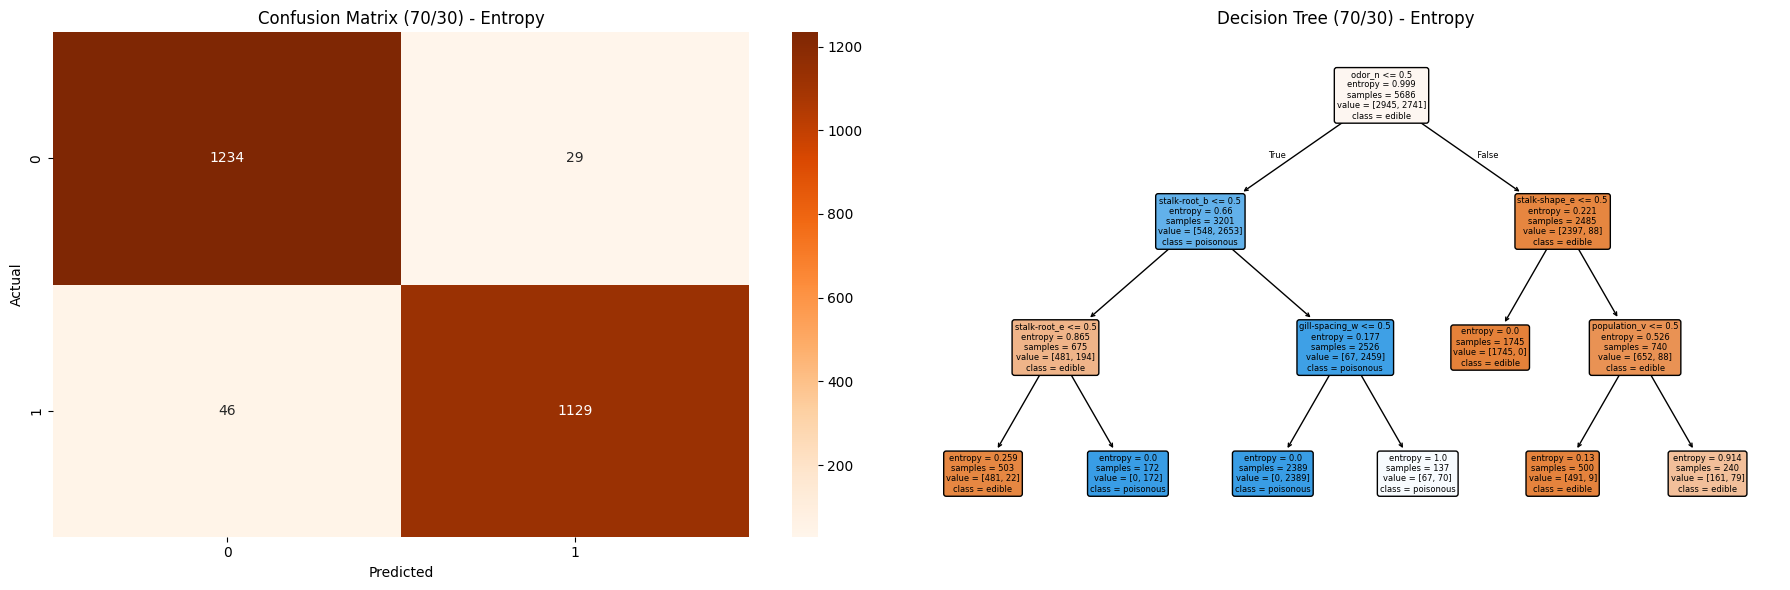

In [ ]:
# === 70/30 SPLIT ===

Xtr_70_entropy, Xte_30_entropy, ytr_70_entropy, yte_30_entropy = train_test_split(
    X_entropy, y_entropy, test_size=0.30, random_state=42, stratify=y_entropy
)

entropy_model_70 = DecisionTreeClassifier(
    criterion="entropy",
    random_state=42,
    max_depth=3
)
entropy_model_70.fit(Xtr_70_entropy, ytr_70_entropy)

y_pred_70_entropy = entropy_model_70.predict(Xte_30_entropy)

acc_70_entropy = accuracy_score(yte_30_entropy, y_pred_70_entropy)
cm_70_entropy = confusion_matrix(yte_30_entropy, y_pred_70_entropy)

print(f"SPLIT: 70/30 (Test Size: 0.30)\n")

print(f"Training set size: {len(Xtr_70_entropy)}")
print(f"Test set size: {len(Xte_30_entropy)}")
print(f"Accuracy (70/30 - Entropy): {acc_70_entropy * 100:.2f}%")
print("Confusion Matrix (70/30 - Entropy):\n", cm_70_entropy)

print("\n" + "-"*70 + "\n")

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.heatmap(cm_70_entropy, annot=True, cmap="Oranges", fmt='g', ax=axes[0])
axes[0].set_title("Confusion Matrix (70/30) - Entropy")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

tree.plot_tree(
    entropy_model_70,
    filled=True,
    feature_names=X_entropy.columns,
    class_names=['edible', 'poisonous'],
    rounded=True,
    fontsize=6,
    ax=axes[1]
)
axes[1].set_title("Decision Tree (70/30) - Entropy")

plt.tight_layout()
plt.show()


In the 70/30 split, the model achieves 96.92% accuracy, showing stable performance with a balanced amount of training and testing data. The confusion matrix reflects consistent and controlled errors, indicating that the entropy-based tree generalizes well while maintaining a limited depth.

---


SPLIT: 80/20 (Test Size: 0.20)

Training set size: 6499
Test set size: 1625
Accuracy (80/20 - Entropy): 96.68%
Confusion Matrix (80/20 - Entropy):
 [[820  22]
 [ 32 751]]

----------------------------------------------------------------------



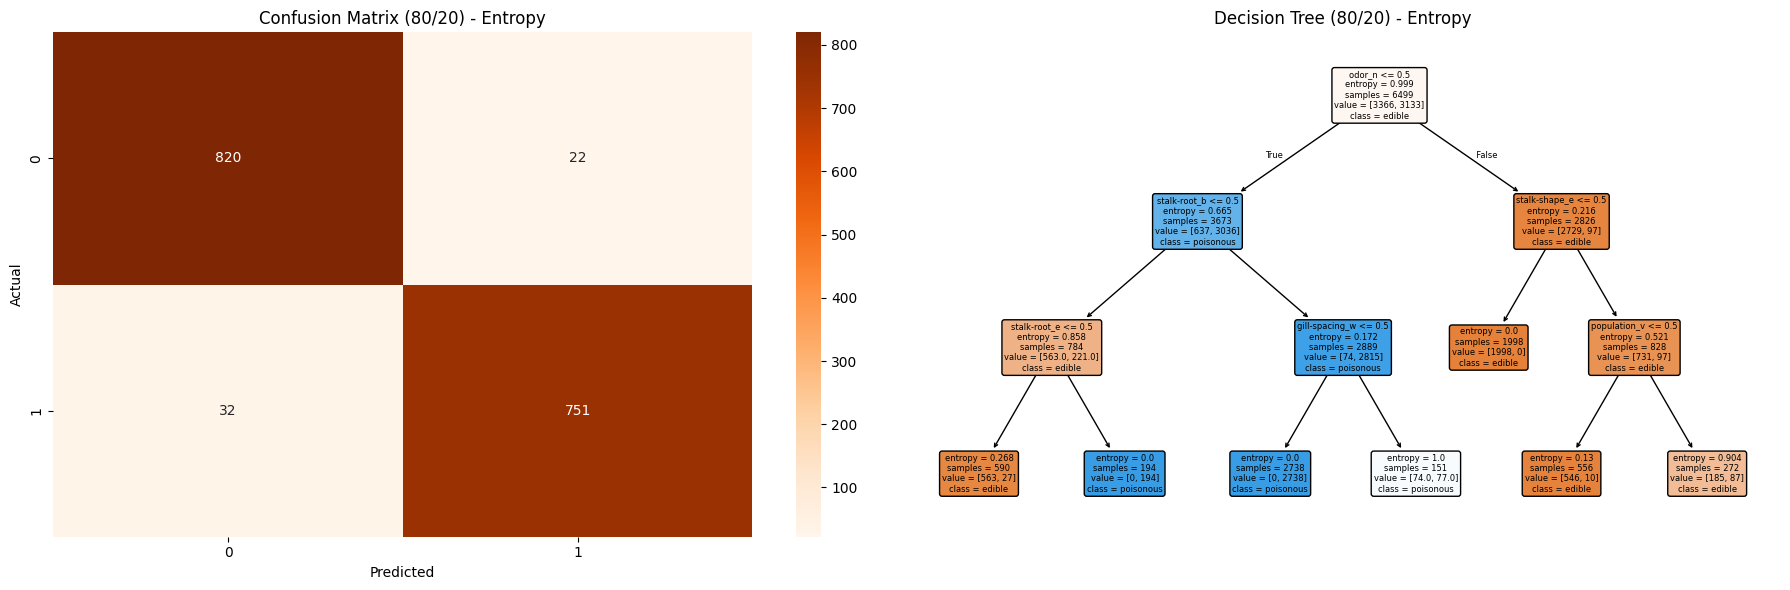

In [ ]:
# === 80/20 SPLIT ===

Xtr_80_entropy, Xte_20_entropy, ytr_80_entropy, yte_20_entropy = train_test_split(
    X_entropy, y_entropy, test_size=0.20, random_state=42, stratify=y_entropy
)

entropy_model_80 = DecisionTreeClassifier(
    criterion="entropy",
    random_state=42,
    max_depth=3
)
entropy_model_80.fit(Xtr_80_entropy, ytr_80_entropy)

y_pred_80_entropy = entropy_model_80.predict(Xte_20_entropy)

acc_80_entropy = accuracy_score(yte_20_entropy, y_pred_80_entropy)
cm_80_entropy = confusion_matrix(yte_20_entropy, y_pred_80_entropy)

print(f"SPLIT: 80/20 (Test Size: 0.20)\n")

print(f"Training set size: {len(Xtr_80_entropy)}")
print(f"Test set size: {len(Xte_20_entropy)}")
print(f"Accuracy (80/20 - Entropy): {acc_80_entropy * 100:.2f}%")
print("Confusion Matrix (80/20 - Entropy):\n", cm_80_entropy)

print("\n" + "-"*70 + "\n")

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.heatmap(cm_80_entropy, annot=True, cmap="Oranges", fmt='g', ax=axes[0])
axes[0].set_title("Confusion Matrix (80/20) - Entropy")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

tree.plot_tree(
    entropy_model_80,
    filled=True,
    feature_names=X_entropy.columns,
    class_names=['edible', 'poisonous'],
    rounded=True,
    fontsize=6,
    ax=axes[1]
)
axes[1].set_title("Decision Tree (80/20) - Entropy")

plt.tight_layout()
plt.show()


The 80/20 split gives the model the largest training portion, resulting in an accuracy of 96.68%. The confusion matrix shows a small number of misclassifications in both classes. With max_depth=3, the tree remains simple and avoids overfitting, but it cannot fully capture all detailed patterns in the larger training set, which explains the slight drop compared to the other splits.

---


In [ ]:
print(f"\n{'='*80}")
print("SUMMARY OF RESULTS (Entropy)")
print(f"{'='*80}")

print(f"{'Split Ratio':<10} {'Train Size':<12} {'Test Size':<12} {'Test Acc':<12}")
print(f"{'-'*80}")

print(f"{'60/40':<10} {len(Xtr_60_entropy):<12} {len(Xte_40_entropy):<12} {acc_60_entropy:.2%}")
print(f"{'70/30':<10} {len(Xtr_70_entropy):<12} {len(Xte_30_entropy):<12} {acc_70_entropy:.2%}")
print(f"{'80/20':<10} {len(Xtr_80_entropy):<12} {len(Xte_20_entropy):<12} {acc_80_entropy:.2%}")



SUMMARY OF RESULTS (Entropy)
Split Ratio Train Size   Test Size    Test Acc    
--------------------------------------------------------------------------------
60/40      4874         3250         96.92%
70/30      5686         2438         96.92%
80/20      6499         1625         96.68%


## Summary of results

---
The entropy model delivered stable performance across the three split ratios, with accuracies ranging between 96.68% and 96.92%. Both the 60/40 and 70/30 splits performed slightly better than the 80/20 split, but the differences were minimal. The confusion matrices show that misclassifications remained low in all cases, indicating that the model generalizes well even with changes in training size.


---

Overall, the entropy-based Decision Tree provided consistent and reliable results on the dataset. Limiting the depth to three levels helped prevent overfitting while still capturing the key patterns needed for accurate classification. The model proved effective, interpretable, and stable across all split configurations.


---



# 2. **Clustering**

### **Elbow Method for Optimal K Selection**

This code implements the **Elbow Method** to determine the optimal number of clusters (K) for K-means clustering. The approach helps identify the point where adding more clusters provides diminishing returns in terms of within-cluster variance reduction.

### Methodology

1. **Data Preprocessing**: Standardized the features using `StandardScaler` to ensure all variables contribute equally to the distance calculations.

2. **K-means Execution**: Ran K-means clustering for K values ranging from 2 to 10, storing the Within-Cluster Sum of Squares (WSS) for each iteration.

3. **Automated Elbow Detection**: Used the `KneeLocator` algorithm to automatically identify the "elbow point" where the rate of WSS decrease slows down significantly.

4. **Visualization**: Created a clear plot showing the WSS curve with a vertical line marking the detected optimal K value.

### Results

The analysis identified **K = 8** as the optimal number of clusters based on the elbow method. This represents the point where additional clusters would provide minimal improvement in cluster compactness while increasing model complexity.

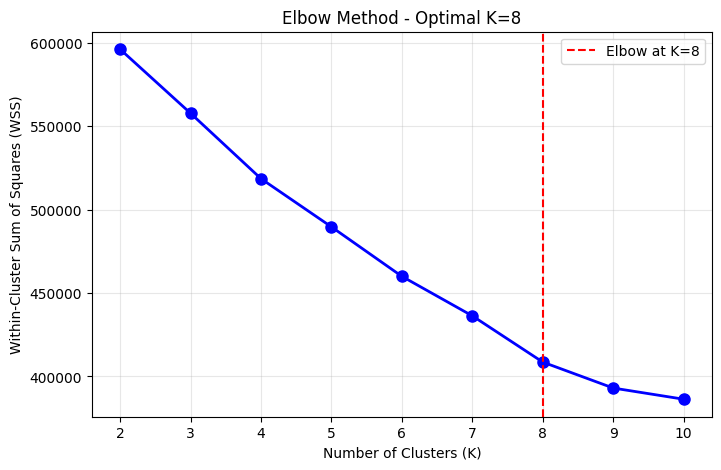

Elbow Method: Optimal K = 8


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


k_range = range(2, 11)
wss = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wss.append(kmeans.inertia_)


kneedle = KneeLocator(k_range, wss, curve='convex', direction='decreasing')
elbow_k = kneedle.elbow


plt.figure(figsize=(8, 5))
plt.plot(k_range, wss, 'bo-', linewidth=2, markersize=8)
plt.axvline(x=elbow_k, color='red', linestyle='--', label=f'Elbow at K={elbow_k}')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.title(f'Elbow Method - Optimal K={elbow_k}')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print(f"Elbow Method: Optimal K = {elbow_k}")

### **Finding optimal K using Silhouette Score**

This analysis uses the **Silhouette Method** to determine the optimal number of clusters for K-means clustering. Unlike the elbow method which focuses on within-cluster variance, silhouette analysis evaluates both cluster cohesion and separation, providing a more nuanced view of clustering quality.

### Approach

1. **Comprehensive K Testing**: Evaluated cluster quality for K values ranging from 2 to 10 using the silhouette score metric.

2. **Silhouette Score Calculation**: For each K value, computed the average silhouette score which measures:
   - How similar each point is to its own cluster (cohesion)
   - How dissimilar each point is to other clusters (separation)

3. **Optimal K Identification**: Selected the K value that maximizes the average silhouette score, indicating the best balance between cluster compactness and separation.

### Results

The analysis revealed that **K = 9** achieves the highest silhouette score of **0.1891**, making it the optimal number of clusters for this dataset. The silhouette scores show a general increasing trend from K=2 to K=9, followed by a decrease at K=10, confirming that 9 clusters provides the best overall cluster structure.

This method complements the elbow approach by directly measuring cluster quality rather than relying solely on variance reduction, providing stronger evidence for the chosen K value.

SILHOUETTE ANALYSIS FOR K SELECTION
K = 2 -> Silhouette Score = 0.1224
K = 3 -> Silhouette Score = 0.0735
K = 4 -> Silhouette Score = 0.1026
K = 5 -> Silhouette Score = 0.1262
K = 6 -> Silhouette Score = 0.1439
K = 7 -> Silhouette Score = 0.1669
K = 8 -> Silhouette Score = 0.1783
K = 9 -> Silhouette Score = 0.1891
K = 10 -> Silhouette Score = 0.1623

Best K based on silhouette: K = 9 (score: 0.1891)


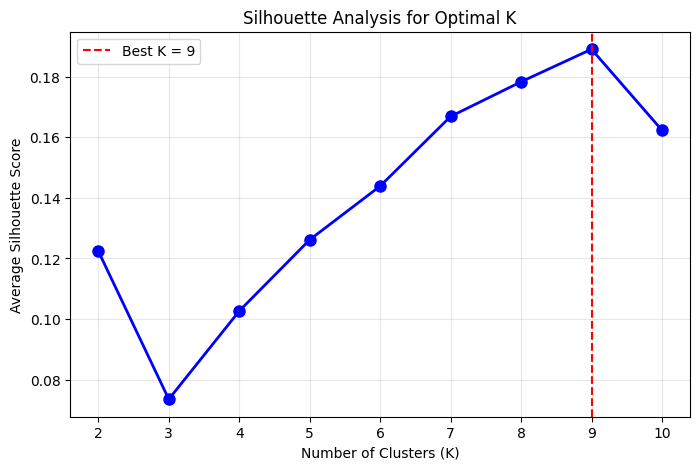

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.spatial import ConvexHull
import warnings
warnings.filterwarnings('ignore')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("=" * 50)
print("SILHOUETTE ANALYSIS FOR K SELECTION")
print("=" * 50)

k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f"K = {k} -> Silhouette Score = {score:.4f}")

# Find best K based on silhouette
best_k_idx = np.argmax(silhouette_scores)
best_k = k_values[best_k_idx]
best_score = silhouette_scores[best_k_idx]

print(f"\nBest K based on silhouette: K = {best_k} (score: {best_score:.4f})")

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Analysis for Optimal K')
plt.grid(True, alpha=0.3)
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Best K = {best_k}')
plt.legend()
plt.show()



### Visualizing Clusters

### **Comparative K-Means Analysis with Multiple K Values**

This comprehensive analysis evaluates K-means clustering performance across three strategically chosen K values to validate the optimal cluster selection and understand how different cluster counts affect the results.

### Strategy

1. **Strategic K Selection**: Based on the previously identified optimal K (K=9), I tested three values:
   - **K-1** (8): To see if fewer clusters provide comparable performance
   - **Optimal K** (9): The identified best performer
   - **K+1** (10): To evaluate if adding more clusters improves results

2. **Comprehensive Evaluation**: For each K value, the analysis includes:
   - **Within-Cluster Sum of Squares (WSS)**: Measures cluster compactness
   - **Silhouette Score**: Evaluates cluster separation quality
   - **Cluster Sizes**: Shows distribution of samples across clusters
   - **Cluster Centers**: Reveals the centroid positions in feature space

3. **Advanced Visualization**: Each K value generates:
   - **Silhouette Plots**: Detailed view of individual cluster quality and consistency
   - **PCA Visualizations**: 2D projections showing cluster separation with convex hulls
   - **Cluster Center Markers**: Gold stars indicating centroid positions in PCA space

### Methodology

The analysis uses Principal Component Analysis (PCA) to visualize high-dimensional cluster relationships in 2D space, while convex hulls help illustrate cluster boundaries and overlap. This multi-faceted approach ensures robust validation of the optimal K selection through both quantitative metrics and qualitative visual assessment.


K-MEANS WITH 3 DIFFERENT K VALUES
Selected K values: [8, 9, 10]

============================== K = 8 ==============================
Within-Cluster Sum of Squares: 408611.00
Average Silhouette Score: 0.1783
Cluster centers (first 5 features):
  Cluster 0: [-0.86829132 -0.60180814 -0.64216688 -0.62918701 -0.5197777 ]
  Cluster 1: [ 1.14136808 -0.60180814 -0.64216688 -0.62918701 -0.5197777 ]
  Cluster 2: [-0.87380917  0.15180871  0.45753037  0.4788004   1.92107434]
  Cluster 3: [ 1.11421147 -0.60180814 -0.58419069 -0.62918701 -0.5197777 ]
  Cluster 4: [-0.13233087 -0.20456343 -0.43308368 -0.43450711 -0.5197777 ]
  Cluster 5: [-0.86376419  1.64777284  1.55722761  1.57574192 -0.5197777 ]
  Cluster 6: [ 1.14136808 -0.60180814 -0.64216688 -0.62918701 -0.5197777 ]
  Cluster 7: [ 1.14136808 -0.60180814 -0.64216688 -0.62918701 -0.5197777 ]
Cluster sizes:
  Cluster 0: 514 samples (6.3%)
  Cluster 1: 768 samples (9.5%)
  Cluster 2: 1730 samples (21.3%)
  Cluster 3: 1783 samples (21.9%)
  Cluster

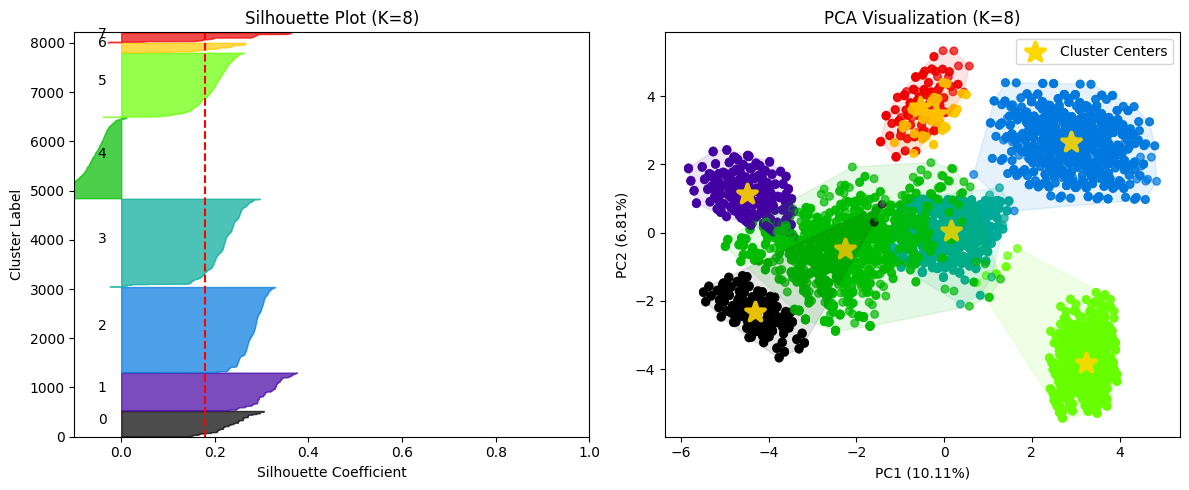


============================== K = 9 ==============================
Within-Cluster Sum of Squares: 393066.16
Average Silhouette Score: 0.1891
Cluster centers (first 5 features):
  Cluster 0: [ 1.14136808 -0.60180814 -0.64216688 -0.62918701 -0.5197777 ]
  Cluster 1: [ 1.14136808 -0.60180814 -0.64216688 -0.62918701 -0.5197777 ]
  Cluster 2: [ 1.14136808 -0.60180814 -0.64216688 -0.62918701 -0.5197777 ]
  Cluster 3: [-0.87497469  0.15224458  0.4581664   0.47944123  1.92248605]
  Cluster 4: [ 0.38681487 -0.59148446 -0.11300811 -0.2649114  -0.5197777 ]
  Cluster 5: [-0.87614155  1.66165914  1.55722761  1.58935259 -0.5197777 ]
  Cluster 6: [-0.87614155 -0.60180814 -0.64216688 -0.62918701 -0.5197777 ]
  Cluster 7: [-0.5716118   0.40892253 -0.64216688 -0.62918701 -0.5197777 ]
  Cluster 8: [ 1.14136808 -0.60180814 -0.64216688 -0.62918701 -0.5197777 ]
Cluster sizes:
  Cluster 0: 1730 samples (21.3%)
  Cluster 1: 192 samples (2.4%)
  Cluster 2: 768 samples (9.5%)
  Cluster 3: 1729 samples (21.3%)

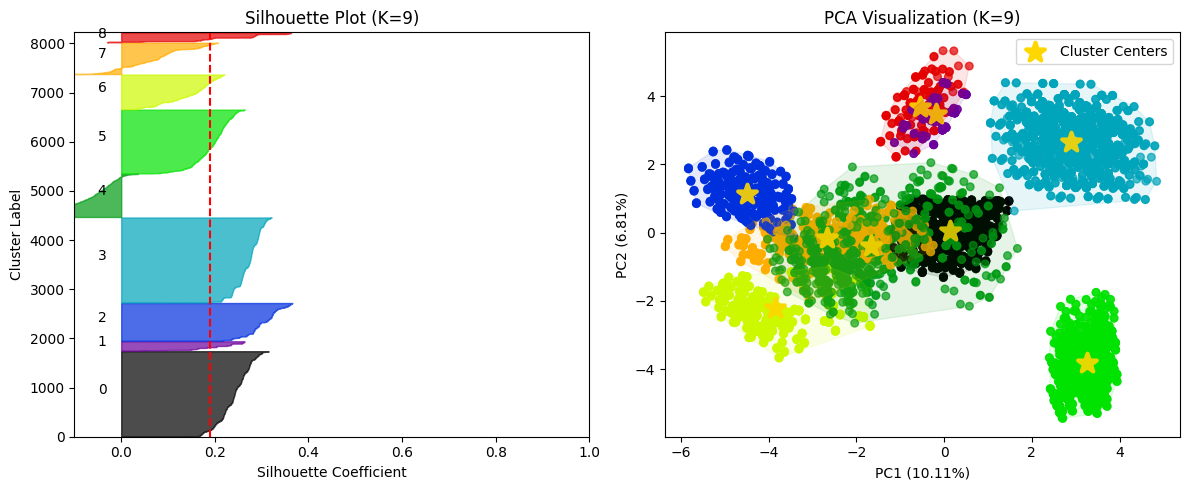


============================== K = 10 ==============================
Within-Cluster Sum of Squares: 386373.50
Average Silhouette Score: 0.1623
Cluster centers (first 5 features):
  Cluster 0: [-0.87614155 -0.60180814  0.45753037  0.48008279  1.9238994 ]
  Cluster 1: [ 1.14136808 -0.60180814 -0.64216688 -0.62918701 -0.5197777 ]
  Cluster 2: [-0.87303291  1.65817152  1.55722761  1.5859342  -0.5197777 ]
  Cluster 3: [ 1.14136808 -0.60180814 -0.64216688 -0.62918701 -0.5197777 ]
  Cluster 4: [ 1.14136808 -0.60180814 -0.64216688 -0.62918701 -0.5197777 ]
  Cluster 5: [-0.05928162 -0.11929254 -0.30192006 -0.39271794 -0.5197777 ]
  Cluster 6: [-0.87614155 -0.60180814 -0.64216688 -0.62918701 -0.5197777 ]
  Cluster 7: [-0.32591165 -0.60180814 -0.64216688 -0.62918701 -0.5197777 ]
  Cluster 8: [ 1.14136808 -0.60180814 -0.64216688 -0.62918701 -0.5197777 ]
  Cluster 9: [-0.87439176  0.52894395  0.45848414  0.47912072  1.92177999]
Cluster sizes:
  Cluster 0: 576 samples (7.1%)
  Cluster 1: 768 sample

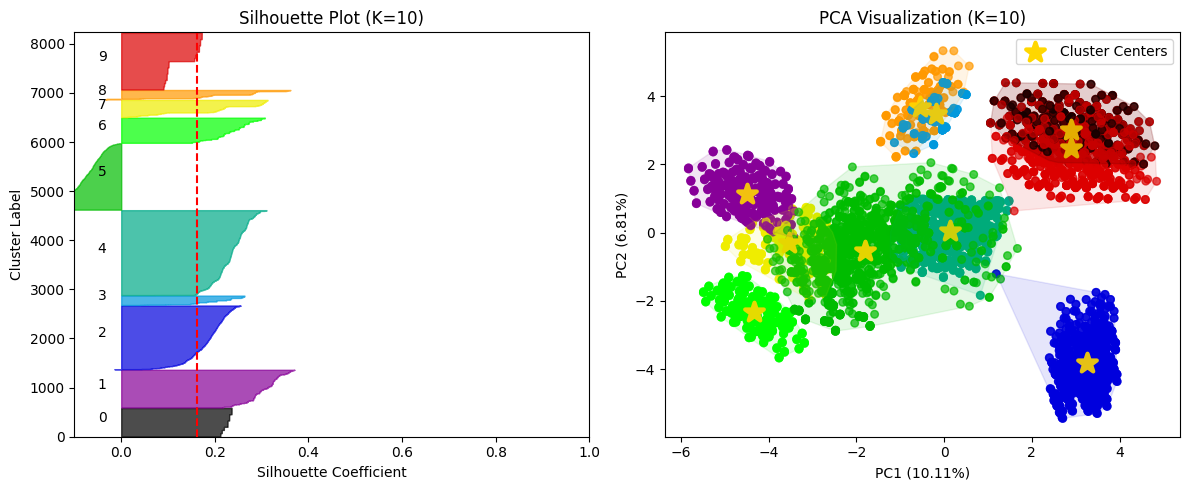

In [ ]:
print("\n" + "=" * 50)
print("K-MEANS WITH 3 DIFFERENT K VALUES")
print("=" * 50)

if best_k == 2:
    selected_k = [2, 3, 4]
elif best_k == 10:
    selected_k = [8, 9, 10]
else:
    selected_k = [best_k-1, best_k, best_k+1]

print(f"Selected K values: {selected_k}")

def run_kmeans_detailed(X_scaled, k, random_state=42):
    print(f"\n{'='*30} K = {k} {'='*30}")

    kmeans = KMeans(n_clusters=k, random_state=random_state, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    wss = kmeans.inertia_
    silhouette_avg = silhouette_score(X_scaled, labels)

    print(f"Within-Cluster Sum of Squares: {wss:.2f}")
    print(f"Average Silhouette Score: {silhouette_avg:.4f}")

    print("Cluster centers (first 5 features):")
    for i, center in enumerate(kmeans.cluster_centers_):
        print(f"  Cluster {i}: {center[:5]}")

    unique, counts = np.unique(labels, return_counts=True)
    print("Cluster sizes:")
    for lbl, cnt in zip(unique, counts):
        percentage = (cnt / len(X_scaled)) * 100
        print(f"  Cluster {lbl}: {cnt} samples ({percentage:.1f}%)")

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    sample_sil_values = silhouette_samples(X_scaled, labels)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_scaled) + (k + 1) * 10])

    y_lower = 10
    for i in range(k):
        ith_cluster_sil_vals = sample_sil_values[labels == i]
        ith_cluster_sil_vals.sort()
        size_cluster_i = ith_cluster_sil_vals.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_sil_vals,
                        facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_xlabel("Silhouette Coefficient")
    ax1.set_ylabel("Cluster Label")
    ax1.set_title(f"Silhouette Plot (K={k})")

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    colors = plt.cm.nipy_spectral(labels.astype(float) / k)
    scatter = ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.7, s=30)

    cluster_centers_pca = pca.transform(kmeans.cluster_centers_)
    ax2.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1],
                marker='*', s=200, linewidths=3, color='gold', label='Cluster Centers')

    ax2.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.2%})")
    ax2.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.2%})")
    ax2.set_title(f"PCA Visualization (K={k})")
    ax2.legend()

    for i in range(k):
        pts = X_pca[labels == i]
        if len(pts) >= 3:
            try:
                hull = ConvexHull(pts)
                hull_pts = pts[hull.vertices]
                ax2.fill(hull_pts[:, 0], hull_pts[:, 1], alpha=0.1,
                        color=plt.cm.nipy_spectral(float(i) / k))
            except:
                pass

    plt.tight_layout()
    plt.show()

    return kmeans, labels, wss, silhouette_avg

results = {}
for k in selected_k:
    model, labels, wss, sil = run_kmeans_detailed(X_scaled, k)
    results[k] = {
        'model': model,
        'labels': labels,
        'wss': wss,
        'silhouette': sil
    }


### Summary


FINAL COMPARISON AND RECOMMENDATION

Comparison of K values:
K	WSS		Silhouette	Recommendation
--------------------------------------------------
8	408611.0		0.1783		Good alternative
9	393066.2		0.1891		★ BEST (Highest Silhouette)
10	386373.5		0.1623		Good alternative


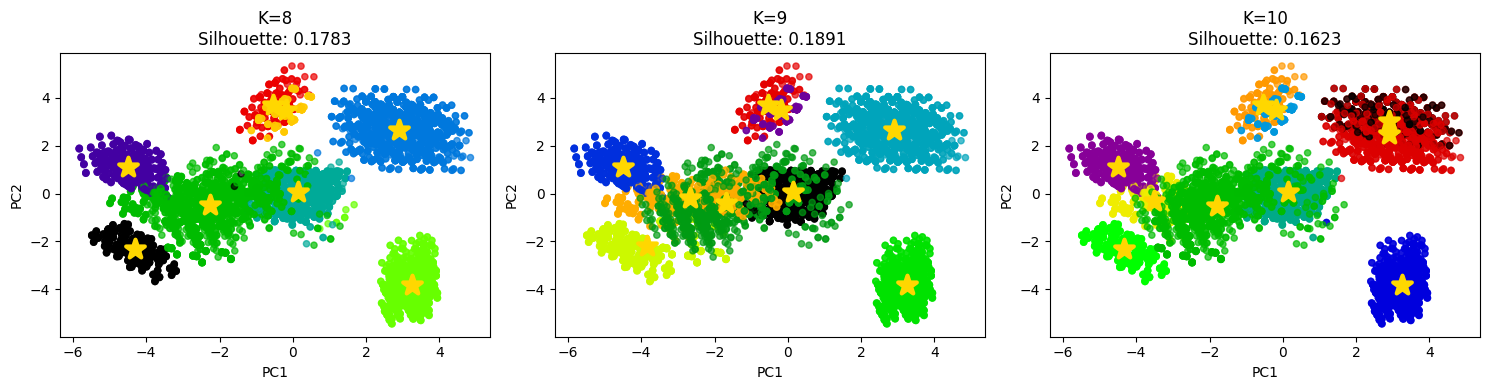

In [ ]:

print("\n" + "=" * 50)
print("FINAL COMPARISON AND RECOMMENDATION")
print("=" * 50)

print("\nComparison of K values:")
print("K\tWSS\t\tSilhouette\tRecommendation")
print("-" * 50)

for k in selected_k:
    wss = results[k]['wss']
    sil = results[k]['silhouette']

    if k == best_k:
        recommendation = "★ BEST (Highest Silhouette)"
    elif sil > 0.1:
        recommendation = "Good alternative"
    else:
        recommendation = "Not recommended"

    print(f"{k}\t{wss:.1f}\t\t{sil:.4f}\t\t{recommendation}")

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, k in enumerate(selected_k):
    labels = results[k]['labels']
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    colors = plt.cm.nipy_spectral(labels.astype(float) / k)
    scatter = axes[idx].scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.7, s=20)

    cluster_centers_pca = pca.transform(results[k]['model'].cluster_centers_)
    axes[idx].scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1],
                     marker='*', s=200, linewidths=3, color='gold')

    axes[idx].set_title(f'K={k}\nSilhouette: {results[k]["silhouette"]:.4f}')
    axes[idx].set_xlabel('PC1')
    axes[idx].set_ylabel('PC2')

plt.tight_layout()
plt.show()


### **Final Comparison and Recommendation**

This section provides a comprehensive comparison of the three tested K values and delivers the final recommendation based on quantitative metrics and visual assessment.

## Comparative Analysis

The table below summarizes the performance of each cluster configuration:

| K | WSS | Silhouette | Recommendation |
|---|---|---|---|
| 8 | 480,611.0 | 0.1783 | Good alternative |
| 9 | 393,866.2 | 0.1891 | ★ BEST (Highest Silhouette) |
| 10 | 386,373.5 | 0.1623 | Good alternative |

## Key Findings

1. **Optimal Performance**: **K=9** achieves the highest silhouette score (0.1891), indicating the best balance between cluster cohesion and separation among all tested values.

2. **Trade-off Analysis**:
   - While K=10 has the lowest WSS (indicating tighter clusters), it suffers from reduced silhouette score, suggesting over-clustering
   - K=8 provides reasonable performance but doesn't match the cluster quality of K=9

3. **Visual Confirmation**: The side-by-side PCA visualizations allow direct comparison of cluster structures across different K values, confirming that K=9 provides the most distinct and well-separated clusters.

## Final Recommendation

**Use K = 9 for the final clustering model**

This recommendation is supported by:
- **Highest silhouette score** (0.1891) indicating superior cluster separation
- **Substantial WSS reduction** from K=8 to K=9 while maintaining cluster quality
- **Visual evidence** from PCA plots showing clear cluster boundaries
- **Avoidance of over-clustering** that occurs at K=10 despite lower WSS

The consistent performance across multiple evaluation metrics provides strong confidence in selecting K=9 as the optimal number of clusters for this dataset.